Jupyter Notebook for Dataset 1: Blog Comment Prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.feature_selection import RFE

Reading in the data set 

In [2]:
blogData = pd.read_csv('blogData_train.csv')


Part A

The number of samples as well as the number of attributes per sample.

In [3]:
print("The blog dataset includes %d samples." %blogData.shape[0])
print("There are %d attributes per sample." %blogData.shape[1])




The blog dataset includes 52396 samples.
There are 281 attributes per sample.


The attributes are as follows:

There are some "basic features" which include the number of links and comments at certain times before the baseTime and the rate at which those attributes increased. There are also features of the blog post itself, including common words as well as the day of thw week the blog was posted. Furthermore there are also features of blog posts that link to the blog post we are currently interested in.

Out of these attributes, the weekday features are categorical which have been transformed into binary indicator.

There are no missing values in the data set.


Histograms of different variables

I choose variables that I thought would have an impact on the final result, but did not use any other reasoning on choosing which variables to plot.

(0.0, 500.0)

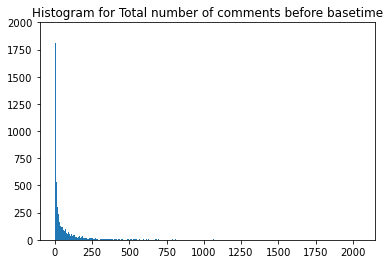

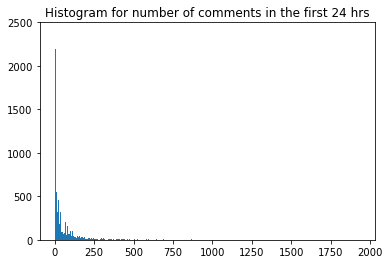

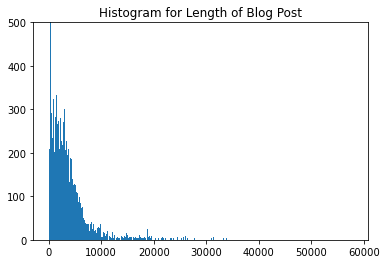

In [4]:
%matplotlib inline
# col 50 has attribute: Total number of comments before basetime
plt.figure(1)
plt.hist(blogData.iloc[:,50],2000)
plt.ylim([0,2000])
plt.title("Histogram for Total number of comments before basetime")

# col 53 has attribut: Number of comments in the first 24 hourse after the publication of the blog post but before basetime
plt.figure(2)
plt.hist(blogData.iloc[:,53], 1500)
plt.ylim([0,2500])
plt.title("Histogram for number of comments in the first 24 hrs")

#col 61 has attribute: length of the blog post
plt.figure(3)
plt.hist(blogData.iloc[:,61],1500)
plt.title("Histogram for Length of Blog Post")
plt.ylim([0,500])


Part B

Feature Selection: x values are the attributes and y values are the results

In [5]:
blogData_x = blogData.iloc[:,0:280]
blogData_y = blogData.iloc[:,-1]

PCA:
Reduce the number of attributes we are looking at to 50 to reduce complexity for the machine learning algorithms.

PCa is a method to reduce the dimensions of attributes we are interested in. The first step is to center the data and standardize it. Then we solve for the eigenvectors and eigenvalues of the covariance matrix to get the principal components. The principal components are linear combinations of the original attributes that are uncorrelated from one another. 

Sklearn has built in preprocessing libraries that I have used below to reduce the dimensionality of the attributes to 50 to reduce the run-time and the complexity of the machine learning algorithms performed later.

In [6]:

pca = PCA(n_components = 50)
X_pca = pca.fit_transform(blogData_x)
print(X_pca.shape)


(52396, 50)


Part C

Separate samples into training and testing data. I choose 30% of our samples to be used for testing and the remaining to be used for training.

We need to separate our samples into training and testing to determine the error of our trained model. Although there are multiple ways of splitting the samples into training and testing, I choose 30% for testing because that leaves enough samples to train the data, and a large enough sample to test the trained model with.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, blogData_y, test_size = .3, random_state = 100)

With the chosen data set, feature extraction has already been performed in generating the blogData_train.csv file.
The process used to extract the features is as follows:

The researchers choose a date and time in the past and set it as the baseTime. They observe information about the blog at various time intervals after the baseTime. The researchers also analyzed the frequency of some words in the blog post, as well as information about other blogs that linked to the sample blog post. 

Furthermore, the dataset already encoded the categorical variables as binary indicator vectors.

Part D

For this regression problems, I choose to perform linear regression as one machine learning method and decision trees as the second method.

For the linear regression, we want to find the best number of parameters to learn. To do this, we will use cross-validation, comparing the training error for each different number of parameters learned. 

Sklearn has libraries to perform linear regression which I have used below. It also has methods to compute cross validation for different number of parameters to learn. 

The Kfold function allows us to specify how many folds we want our cross validation to do. It also allows us to specify if we want the data to be shuffled, and to choose how the indices are ordered.

Multivariate linear regression is a method that uses several explanatory variables to predict the outcome of the attributes. The formula for linear regression is as follows:

y_i = b_0 + b_1x_1 + b_2x_2 + ...

where b_i are coefficients for the attributes and x_i is an attribute that contributes to the outcome y_i

The number of learned features tells us how many coefficients we need to learn.

In [8]:
model = LinearRegression()

folds = KFold(n_splits=5, shuffle=True, random_state=100)

hyper_params = [{'n_features_to_select' : list(range(1,50))}]

model.fit(x_train, y_train)

rfe = RFE(model)

model_cv = GridSearchCV(estimator = rfe, param_grid=hyper_params, scoring = 'r2', cv = folds, verbose = 1, return_train_score=True)

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

GridSearchCV is a method within sklearn that we can use to compute multiple cross validation for differences in features. In this case, I computed cross validation for linear regression with the number of learned paramaters ranging from 1 to 50 (since we reduced the dimensionality to 50 features using PCA)

I have printed out the results from computing these cross validations below.

In [9]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.786135,0.081450,0.001401,0.000495,1,{'n_features_to_select': 1},0.000051,-0.001574,-0.000213,-0.000397,...,-0.000265,0.000773,34,0.000272,0.000493,0.000322,0.000146,0.000136,0.000274,0.000131
1,1.740538,0.005402,0.001488,0.000422,2,{'n_features_to_select': 2},0.000172,-0.001794,-0.000980,0.000028,...,-0.000397,0.000868,35,0.000786,0.000627,0.000470,0.000349,0.000240,0.000495,0.000194
2,1.737207,0.010530,0.001966,0.000139,3,{'n_features_to_select': 3},-0.001591,-0.001890,-0.000997,-0.000376,...,-0.000836,0.000916,43,0.003451,0.000756,0.000541,0.000477,0.000324,0.001110,0.001179
3,1.729333,0.009432,0.001926,0.000104,4,{'n_features_to_select': 4},-0.001573,-0.001116,-0.000662,-0.000503,...,-0.000481,0.001035,36,0.003499,0.001122,0.000985,0.000646,0.000695,0.001389,0.001069
4,1.730829,0.006216,0.001951,0.000183,5,{'n_features_to_select': 5},-0.001542,-0.001347,-0.001185,-0.000591,...,-0.000785,0.000826,41,0.003554,0.001218,0.001122,0.000737,0.000763,0.001479,0.001055
5,1.722172,0.009281,0.001612,0.000374,6,{'n_features_to_select': 6},-0.001353,-0.001283,-0.001273,-0.000233,...,-0.000739,0.000724,39,0.003595,0.001252,0.001192,0.001191,0.000836,0.001614,0.001002
6,1.764950,0.051077,0.001806,0.000671,7,{'n_features_to_select': 7},-0.001419,-0.001120,-0.001175,-0.000804,...,-0.000834,0.000622,42,0.003636,0.001286,0.001286,0.001281,0.000889,0.001676,0.000992
7,1.764628,0.015739,0.001977,0.000166,8,{'n_features_to_select': 8},-0.001247,-0.000663,-0.001370,-0.000770,...,-0.000777,0.000543,40,0.003707,0.003395,0.001337,0.001348,0.000964,0.002150,0.001156
8,1.756483,0.014537,0.002022,0.000317,9,{'n_features_to_select': 9},-0.001929,-0.001073,-0.001120,-0.000773,...,-0.000711,0.001095,38,0.003959,0.003476,0.001381,0.001399,0.002955,0.002634,0.001064
9,1.745631,0.019326,0.001900,0.000121,10,{'n_features_to_select': 10},-0.001979,-0.000951,-0.003439,-0.000979,...,-0.001193,0.001575,47,0.004025,0.003508,0.003910,0.001437,0.003011,0.003178,0.000940


To determine the optimal number of features to select for linear regression on this dataset, I plotted the mean test scores, or the R^2 values below. R^2 is a measure that represents the how the variance of the outcome is explained by the attributes we are considering. Theoretically, we want an R^2 value close to 1, however since there is high variance in our attributes and since we are trying to model human behavior in the form of comments on a blog post, it is less likely to have a high R^2 value.

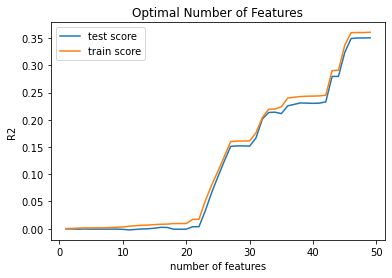

In [10]:
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('R2')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

From the graph we can see that the test score and the train score have a plateau at 45 learned parameters, so we choose this as the optimal number of features. This gives us a high enough R^2 value for our learned model. This gives us a high enough R^2 value, and since the value seems to plateau here, we do not need to increase the complexity of the model and learn more features.

In [11]:
from sklearn import metrics

n_features_optimal = 45

model = LinearRegression()
model.fit(x_train, y_train)

rfe = RFE(model, n_features_to_select=n_features_optimal)
rfe = rfe.fit(x_train, y_train)

y_pred = rfe.predict(x_test)

test_accuracy_linear = metrics.r2_score(y_test, y_pred)
print("The R^2 value for linear regression with 45 features is " + str(test_accuracy_linear))

The R^2 value for linear regression with 45 features is 0.34321650151696315


For decision trees, we want to find the maximum depth that gives us a high R^2 value. To do this, we use cross validation with different values for max depth.

DecisionTreeRegressor is another model within sklearn library that creates a decision tree with a specified maximum depth. I choose R^2 as the measure of error here as well for cross validation so that I can compare the performance of the two models.

In [12]:
folds = KFold(n_splits=5, shuffle=True, random_state=100)

tree_model = DecisionTreeRegressor()
parameters = {'max_depth': range(1,10)}
tree_cv = GridSearchCV(tree_model, param_grid=parameters, scoring = 'r2', cv = folds, verbose = 1, return_train_score = True) 
tree_gridSearch = tree_cv.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [13]:
tree_results = pd.DataFrame(tree_cv.cv_results_)
tree_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.238583,0.017441,0.001988,0.000618,1,{'max_depth': 1},0.344954,0.267434,0.277613,0.329495,...,0.307139,0.029867,6,0.313780,0.331256,0.327171,0.314749,0.322294,0.321850,0.006820
1,0.436226,0.004926,0.001596,0.000488,2,{'max_depth': 2},0.424528,0.347601,0.308837,0.430688,...,0.377342,0.046163,4,0.421050,0.450825,0.442568,0.414343,0.445664,0.434890,0.014441
2,0.631570,0.000398,0.001997,0.000004,3,{'max_depth': 3},0.450719,0.414714,0.375511,0.478012,...,0.417683,0.042057,1,0.489250,0.521216,0.515438,0.489510,0.522531,0.507589,0.015058
3,0.833563,0.001928,0.001802,0.000383,4,{'max_depth': 4},0.360371,0.377431,0.390356,0.490269,...,0.406763,0.045452,2,0.563899,0.583278,0.570954,0.554894,0.580912,0.570788,0.010570
4,1.042214,0.021719,0.001981,0.000631,5,{'max_depth': 5},0.414951,0.371840,0.312891,0.457543,...,0.387829,0.047962,3,0.634308,0.628869,0.628560,0.615855,0.633072,0.628133,0.006542
5,1.225528,0.004052,0.001991,0.000003,6,{'max_depth': 6},0.378659,0.287554,0.292049,0.468201,...,0.342239,0.072124,5,0.694036,0.674992,0.680384,0.673016,0.691996,0.682885,0.008640
6,1.422401,0.005400,0.001977,0.000026,7,{'max_depth': 7},0.394494,0.240344,0.243886,0.485715,...,0.306451,0.116096,7,0.737596,0.719648,0.731383,0.738439,0.750621,0.735537,0.010099
7,1.629866,0.023919,0.002183,0.000380,8,{'max_depth': 8},0.347398,0.304233,0.221182,0.388899,...,0.281462,0.087751,8,0.782075,0.753912,0.779072,0.785121,0.798828,0.779802,0.014604
8,1.874200,0.039025,0.002180,0.000374,9,{'max_depth': 9},0.372483,0.237244,0.099922,0.415055,...,0.263287,0.116141,9,0.819655,0.791013,0.823501,0.825774,0.834379,0.818864,0.014739


In [14]:
print(tree_gridSearch.best_params_)


{'max_depth': 3}


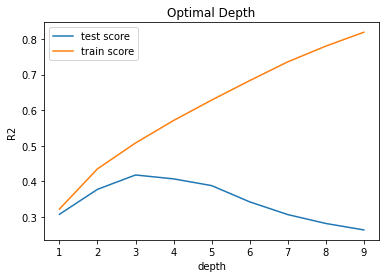

In [15]:
plt.plot(tree_results["param_max_depth"], tree_results["mean_test_score"])
plt.plot(tree_results["param_max_depth"], tree_results["mean_train_score"])
plt.xlabel('depth')
plt.ylabel('R2')
plt.title("Optimal Depth")
plt.legend(['test score', 'train score'], loc='upper left')

From the graph above as well as the best parameter determined by the model, the optimal max depth is 3. At a depth of 3, we see that the test score has the highest R^2 value and the value decreses from there. Now we train our model using this depth to predict the results from our test samples.

In [16]:
from sklearn import metrics
opt_depth = 3
treeModel = DecisionTreeRegressor(max_depth=opt_depth)
treeModel.fit(x_train, y_train)
y_pred = treeModel.predict(x_test)

test_accuracy = metrics.r2_score(y_test, y_pred)
print("The R^2 value for a decision tree with max depth of 3 is "  + str(test_accuracy))

The R^2 value for a decision tree with max depth of 3 is 0.4741177770261036


The R^2 value is about .47 which is higher than the R^2 value we got using multivariate linear regression. Since we are trying to predict the number of comments a post will receive, it is not unusual to have an R^2 value less than .5 since it is partly trying to predict human actions.

Out of the two models, linear regression with 45 learned parameters and a decision tree with maximum depth of 3, the decision tree has a higher R^2 value of .47 compared to that of the linear regression model, .343. Furthermore, since the decision tree has depth of only 3 compared to learning 45 parameters for linear regression, the decision tree has less complexity.

Out of the two methods I used, I would recommend decision trees for this particular dataset.